### audio_data processing

In [ ]:
import os, sys
from os.path import dirname, abspath, basename, exists, splitext
from os.path import join as joinPath

DUPLICATE_MARKER = '1'

def flattenFiles( here ):
    '''Move all files in subdirs to here, then delete subdirs.
       Conflicting files are renamed, with 1 appended to their name.'''
    for root, dirs, files in os.walk( here, topdown=False ):
        if root != here:
            for name in files:
                source = joinPath( root, name )
                target = handleDuplicates( joinPath( here, name ) )
                os.rename( source, target )

        for name in dirs:
            os.rmdir( joinPath( root, name ) )

def handleDuplicates( target ):
    while exists( target ):
        base, ext = splitext( target )
        target    = base + DUPLICATE_MARKER + ext
    return target

### necessary libraries: resemblyzer, pyannote

In [5]:
from resemblyzer import preprocess_wav, VoiceEncoder
from demo_utils import *
from itertools import groupby
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False 
plt.rcParams["font.family"] = 'NanumGothic'

### utterance embedding: umap projection
- compare speech utterances between iptv speakers
- metric: how similar their sounds

In [8]:
wav_fpaths = list(Path("audio_data", "iptv_uttr", "sample").glob("**/*.wav"))
speakers = list(map(lambda wav_fpath: wav_fpath.parent.stem, wav_fpaths))
wavs = np.array(list(map(preprocess_wav, tqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths), position=0))))
speaker_wavs = {speaker: wavs[list(indices)] for speaker, indices in 
                groupby(range(len(wavs)), lambda i: speakers[i])}b

Preprocessing wavs: 100%|██████████| 1580/1580 [00:13<00:00, 119.59it/s]


In [9]:
for key, value in sorted(speaker_wavs.items()):
    print(key, len(value))

김나영 152
김윤재 152
김지현 161
김진주 151
김훈 183
류성균 157
문성재 140
박민선 151
박상훈 147
박지웅 186


In [10]:
encoder = VoiceEncoder()

Loaded the voice encoder model on cuda in 0.03 seconds.


In [11]:
utterance_embeds = np.array(list(map(encoder.embed_utterance, wavs)))

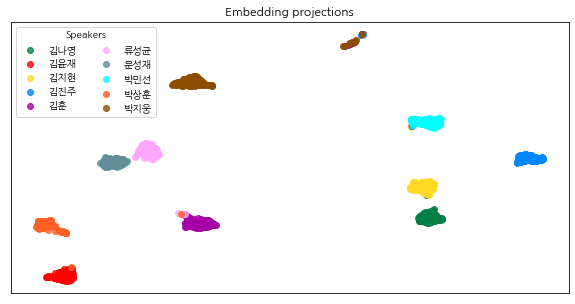

In [12]:
## Project the embeddings in 2D space
plot_projections(utterance_embeds, speakers, title="Embedding projections")
plt.show()

Preprocessing wavs: 100%|██████████| 1608/1608 [00:12<00:00, 127.15it/s]
Loaded the voice encoder model on cuda in 0.02 seconds.


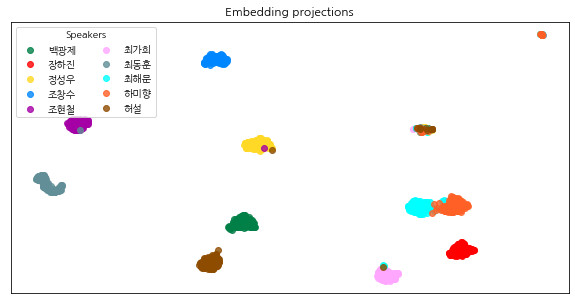

In [13]:
wav_fpaths_2 = list(Path("audio_data", "iptv_uttr", "sample2").glob("**/*.wav"))
speakers_2 = list(map(lambda wav_fpath: wav_fpath.parent.stem, wav_fpaths_2))
wavs_2 = np.array(list(map(preprocess_wav, tqdm(wav_fpaths_2, "Preprocessing wavs", len(wav_fpaths_2), position=0))))
speaker_wavs_2 = {speaker: wavs_2[list(indices)] for speaker, indices in 
                    groupby(range(len(wavs_2)), lambda i: speakers_2[i])} 

## Compute the embeddings
encoder_2 = VoiceEncoder()
utterance_embeds_2 = np.array(list(map(encoder_2.embed_utterance, wavs_2)))

plot_projections(utterance_embeds_2, speakers_2, title="Embedding projections")
plt.show()

In [4]:
wav_fpaths = list(Path("audio_data", "librispeech_test-other").glob("**/*.flac"))

# Group the wavs per speaker 
# It normalizes the volume, trims long silences and resamples the wav to the correct sampling rate.
speaker_wavs = {speaker: list(map(preprocess_wav, wav_fpaths)) for speaker, wav_fpaths in
                groupby(tqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths), unit="wavs"), 
                        lambda wav_fpath: wav_fpath.parent.stem)}

Preprocessing wavs: 100%|██████████| 100/100 [00:03<00:00, 28.13wavs/s]


In [49]:
speaker_wavs.get('533')[0]

array([0.00271606, 0.00335693, 0.00338745, ..., 0.0039978 , 0.00094604,
       0.00265503], dtype=float32)

In [5]:
## Similarity between two utterances from each speaker
# Embed two utterances A and B for each speaker
embeds_a = np.array([encoder.embed_utterance(wavs[0]) for wavs in speaker_wavs.values()])
embeds_b = np.array([encoder.embed_utterance(wavs[1]) for wavs in speaker_wavs.values()])
# Each array is of shape (num_speakers, embed_size) which should be (10, 256) if you haven't 
# changed anything.
print("Shape of embeddings: %s" % str(embeds_a.shape))

Shape of embeddings: (10, 256)


In [52]:
embeds_a[1]

array([6.31893128e-02, 5.13631552e-02, 7.24454448e-02, 0.00000000e+00,
       6.61190087e-03, 1.89319570e-02, 0.00000000e+00, 1.95043662e-03,
       6.23521209e-02, 6.98926300e-02, 1.99684143e-01, 1.38620168e-01,
       6.04683198e-02, 0.00000000e+00, 1.63910707e-04, 5.79986498e-02,
       1.19640119e-01, 7.90507346e-02, 5.45534363e-04, 5.28768823e-03,
       0.00000000e+00, 2.37109829e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.72661170e-01, 0.00000000e+00, 2.43411977e-02,
       0.00000000e+00, 0.00000000e+00, 8.46828073e-02, 1.36743993e-01,
       2.07807809e-01, 2.69755851e-02, 9.41293128e-03, 7.79027343e-02,
       2.46855263e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.42696407e-02, 2.84325127e-02, 7.78171932e-03,
       1.87398698e-02, 4.81073260e-02, 0.00000000e+00, 1.18772425e-02,
       3.65689844e-02, 9.96477678e-02, 0.00000000e+00, 1.18138745e-01,
       0.00000000e+00, 0.00000000e+00, 7.28397723e-03, 0.00000000e+00,
      

In [53]:
# Compute the similarity matrix. The similarity of two embeddings is simply their dot 
# product, because the similarity metric is the cosine similarity and the embeddings are 
# already L2-normed.
# Short version:
utt_sim_matrix = np.inner(embeds_a, embeds_b)

In [56]:
utt_sim_matrix

array([[0.84941155, 0.54993993, 0.43868414, 0.61551446, 0.5447637 ,
        0.5214552 , 0.5216468 , 0.5359219 , 0.5910733 , 0.5620831 ],
       [0.48881927, 0.8486066 , 0.4328674 , 0.44236866, 0.6409074 ,
        0.6279444 , 0.44331667, 0.50390303, 0.43653658, 0.61696285],
       [0.4768729 , 0.3859311 , 0.8095878 , 0.4804859 , 0.5280654 ,
        0.4955656 , 0.55678296, 0.55642915, 0.707462  , 0.5523038 ],
       [0.67057866, 0.49267724, 0.528635  , 0.8020373 , 0.59880775,
        0.5607316 , 0.5478352 , 0.50448465, 0.584129  , 0.58803207],
       [0.52101725, 0.60684013, 0.37939936, 0.45869932, 0.86183935,
        0.5118241 , 0.5175388 , 0.48488566, 0.53038543, 0.5838542 ],
       [0.6135707 , 0.6136346 , 0.42826977, 0.49766162, 0.5293053 ,
        0.9472173 , 0.48334348, 0.50273633, 0.50378263, 0.72091955],
       [0.49948242, 0.43306005, 0.42360693, 0.49415898, 0.5289954 ,
        0.497412  , 0.9187456 , 0.6447414 , 0.5979606 , 0.46945155],
       [0.49675217, 0.5174678 , 0.5145152

In [59]:
# Long, detailed version:
utt_sim_matrix2 = np.zeros((len(embeds_a), len(embeds_b)))
for i in range(len(embeds_a)):
    for j in range(len(embeds_b)):
        # The @ notation is exactly equivalent to np.dot(embeds_a[i], embeds_b[i])
        utt_sim_matrix2[i, j] = embeds_a[i] @ embeds_b[j]
assert np.allclose(utt_sim_matrix, utt_sim_matrix2)

<AxesSubplot:title={'center':'Normalized histogram of similarity\nvalues between utterances'}>

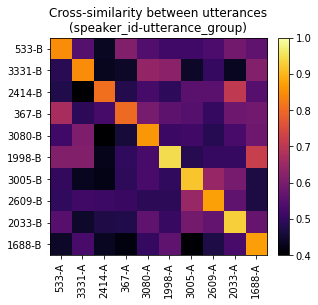

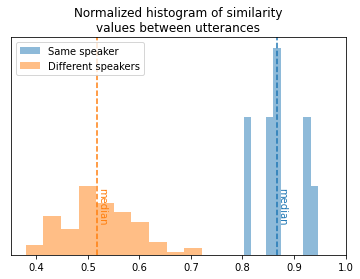

In [68]:
labels_a = ["%s-A" % i for i in speaker_wavs.keys()]
labels_b = ["%s-B" % i for i in speaker_wavs.keys()]
mask = np.eye(len(utt_sim_matrix2), dtype=np.bool)

plot_similarity_matrix(utt_sim_matrix2, labels_a, labels_b, 
                       title="Cross-similarity between utterances\n(speaker_id-utterance_group)")
plot_histograms((utt_sim_matrix2[mask], utt_sim_matrix2[np.logical_not(mask)]), 
                names=["Same speaker", "Different speakers"], 
                title="Normalized histogram of similarity\nvalues between utterances")

In [93]:
speaker_wavs.keys()

dict_keys(['533', '3331', '2414', '367', '3080', '1998', '3005', '2609', '2033', '1688'])

<AxesSubplot:title={'center':'Normalized histogram of similarity\nvalues between utterances'}>

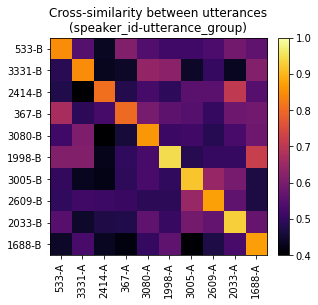

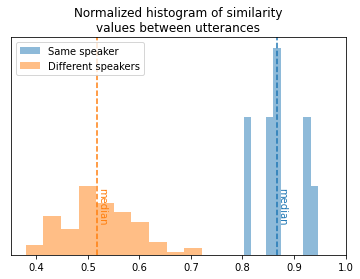

In [67]:
labels_a = ["%s-A" % i for i in speaker_wavs.keys()]
labels_b = ["%s-B" % i for i in speaker_wavs.keys()]
mask = np.eye(len(utt_sim_matrix), dtype=np.bool)

plot_similarity_matrix(utt_sim_matrix, labels_a, labels_b, 
                       title="Cross-similarity between utterances\n(speaker_id-utterance_group)")
plot_histograms((utt_sim_matrix[mask], utt_sim_matrix[np.logical_not(mask)]), 
                names=["Same speaker", "Different speakers"], 
                title="Normalized histogram of similarity\nvalues between utterances")

In [77]:
utt_sim_matrix2[mask]

array([0.84941125, 0.84860665, 0.80958796, 0.80203724, 0.86183929,
       0.94721746, 0.9187457 , 0.87353784, 0.93061626, 0.87213206])

In [160]:
## Similarity between two speaker embeddings
# Divide the utterances of each speaker in groups of identical size and embed each group as a
# speaker embedding
spk_embeds_a = np.array([encoder.embed_speaker(wavs[:len(wavs) // 2]) \
                         for wavs in speaker_wavs.values()])
spk_embeds_b = np.array([encoder.embed_speaker(wavs[len(wavs) // 2:]) \
                         for wavs in speaker_wavs.values()])
spk_sim_matrix = np.inner(spk_embeds_a, spk_embeds_b)

In [146]:
labels_a

['533-A',
 '3331-A',
 '2414-A',
 '367-A',
 '3080-A',
 '1998-A',
 '3005-A',
 '2609-A',
 '2033-A',
 '1688-A']

In [162]:
spk_sim_matrix.shape

(10, 10)

In [152]:
spk_embeds_total = np.array([encoder.embed_speaker(wavs[:len(wavs)]) \
                         for wavs in speaker_wavs.values()])

In [155]:
spk_embeds_total.shape

(10, 256)

In [148]:
test_path = Path("audio_data", "utt-spk", "test-fake", "533-1066-0000.flac")
test_wav = preprocess_wav(test_path)
test_embed = encoder.embed_utterance(test_wav)

In [154]:
test_embed.shape

(256,)

In [177]:
spk_sim_matrix = np.inner(spk_embeds_total, test_embed)
spk_sim_matrix

array([0.8568524 , 0.5019783 , 0.43173993, 0.63089824, 0.59826434,
       0.52157557, 0.45068747, 0.39715868, 0.5246476 , 0.5060291 ],
      dtype=float32)

In [183]:
labels = [i for i in speaker_wavs.keys()]

In [185]:
stats = dict(zip(labels, spk_sim_matrix))
max(stats, key=stats.get)

'533'

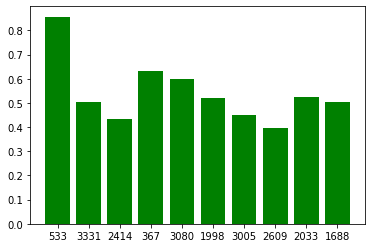

In [186]:
plt.bar(list(stats.keys()), stats.values(), color='g')
plt.show()